In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='Mam', src=FILE, fpath='./hce_data/mam/mam.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.01360011100769043] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "rads": "numeric",
    "age": "numeric",
    "shape": "numeric",
    "margin": "numeric",
    "density": "numeric",
    "severity": "numeric"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'rads': ['equal'], 'age': ['equal'], 'shape': ['equal'], 'margin': ['equal'], 'density': ['equal'], 'severity': ['equal']}
INFO:profiler.data.dataset:(possible operators: equal, notequal, greater_than, less_than)
INFO:profiler.utility:[0.03643083572387695] Load Data execution time: 0.022830724716186523



In [4]:
pf.session.load_training_data(multiplier = None, difference=True)

INFO:profiler.utility:[0.043470144271850586] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 3 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 3, and the bound is 0.00172737
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 6/6 [00:00<00:00, 294.06it/s]
INFO:profiler.data.transformer:Number of training samples: 4980
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.12447452545166016] Create Training Data execution time: 0.08100438117980957



In [5]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.13115668296813965] Learn Structure start

INFO:profiler.learner:use threshold 0.3933
INFO:profiler.utility:[0.20984959602355957] Learn Structure execution time: 0.07869291305541992



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.2165384292602539] Get Dependencies start

INFO:profiler.utility:[0.2691993713378906] Get Dependencies execution time: 0.05266094207763672



shape -> age (0.016413491984552317)
shape,age -> density (0.2328546285982095)
shape,age,density -> severity (0.2541440855289468)
shape,density,severity -> margin (0.1819315194968902)
density,severity,margin -> rads (0.20803549081537706)
{'shape': array([], dtype=object), 'age': array(['shape'], dtype=object), 'density': array(['shape', 'age'], dtype=object), 'severity': array(['shape', 'age', 'density'], dtype=object), 'margin': array(['shape', 'density', 'severity'], dtype=object), 'rads': array(['density', 'severity', 'margin'], dtype=object)}


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


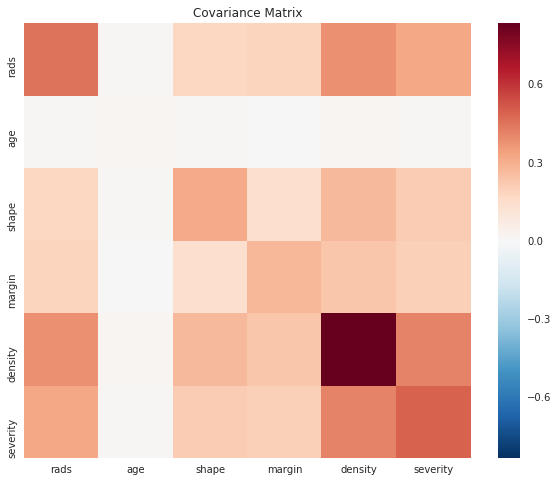

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


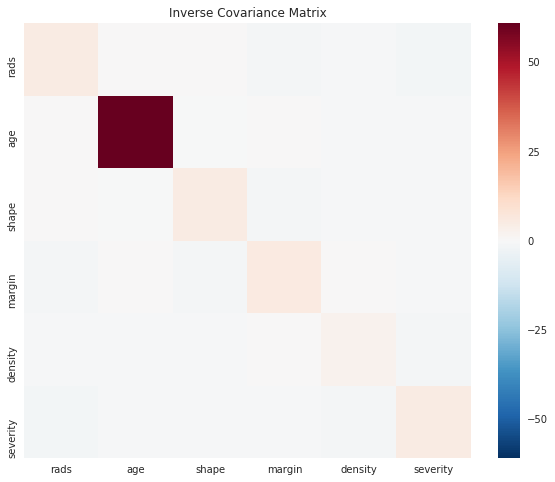

none-zero pairs of abs inv


In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


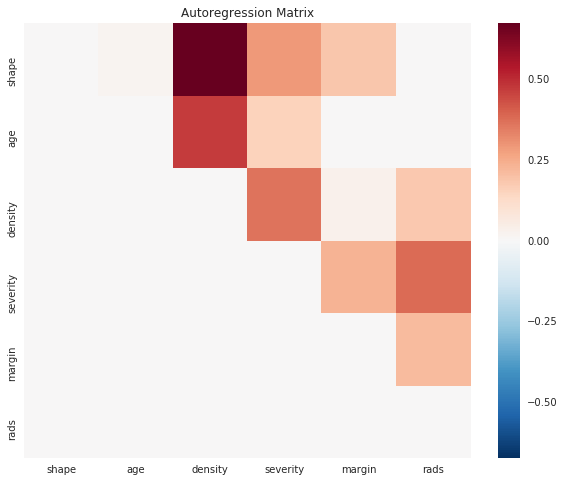

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.013600,start: Load Data,0.000000
1,0.036431,end: Load Data,0.022831
2,0.043470,start: Create Training Data,0.000000
3,0.124475,end: Create Training Data,0.081004
4,0.131157,start: Learn Structure,0.000000
5,0.209850,end: Learn Structure,0.078693
6,0.216538,start: Get Dependencies,0.000000
7,0.269199,end: Get Dependencies,0.052661
8,0.269199,total_execution_time,0.235189


In [11]:
pf.session.timer.to_csv()